<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [5]:
## Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65457.000000,3.374400e+04,29664.000000,29330.000000,29399.000000,29417.000000,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,2.343700e+04,29131.000000
mean,32714.493591,2.963490e+145,11.466323,18.578998,7.520604,10.059485,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,8.615893e+04,6.934915
std,18892.431636,5.443794e+147,9.168205,25.965347,18.421094,21.831924,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,1.867532e+05,2.088356
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16354.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32716.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49076.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.080000e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [6]:
# Summary of columns including NaN values
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65457.000000,65457,65457,65457,54820,65457,54480,60803,60507,49251,...,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,56198,56255,2.343700e+04,29131.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50219,23913,39051,23018,65457,9995,24947,3676,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38778,30081,NaN,NaN
mean,32714.493591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,NaN,NaN,8.615893e+04,6.934915
std,18892.431636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,NaN,NaN,1.867532e+05,2.088356
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16354.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32716.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.080000e+05,8.000000


In [7]:
# Finding null values in data
missing_values = df.isnull().sum()

# Filters list to all columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Prints summary
print(missing_values)

AINextMuch less integrated    64309
AINextLess integrated         63102
AINextNo change               52955
AINextMuch more integrated    52018
EmbeddedAdmired               48718
                              ...  
YearsCode                      5570
NEWSOSites                     5151
LearnCode                      4950
EdLevel                        4654
AISelect                       4531
Length: 109, dtype: int64


In [8]:
## Write your code here
# Retrieve columns with NaN values
missing_data = df.isnull()

# Print each column with number of NaN 
for col in missing_data.columns.values.tolist():
    print(missing_data[col].value_counts())
    print()

ResponseId
False    65457
Name: count, dtype: int64

MainBranch
False    65457
Name: count, dtype: int64

Age
False    65457
Name: count, dtype: int64

Employment
False    65457
Name: count, dtype: int64

RemoteWork
False    54820
True     10637
Name: count, dtype: int64

Check
False    65457
Name: count, dtype: int64

CodingActivities
False    54480
True     10977
Name: count, dtype: int64

EdLevel
False    60803
True      4654
Name: count, dtype: int64

LearnCode
False    60507
True      4950
Name: count, dtype: int64

LearnCodeOnline
False    49251
True     16206
Name: count, dtype: int64

TechDoc
False    40907
True     24550
Name: count, dtype: int64

YearsCode
False    59887
True      5570
Name: count, dtype: int64

YearsCodePro
False    51623
True     13834
Name: count, dtype: int64

DevType
False    59463
True      5994
Name: count, dtype: int64

OrgSize
False    47488
True     17969
Name: count, dtype: int64

PurchaseInfluence
False    47414
True     18043
Name: count, dtype: 

##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



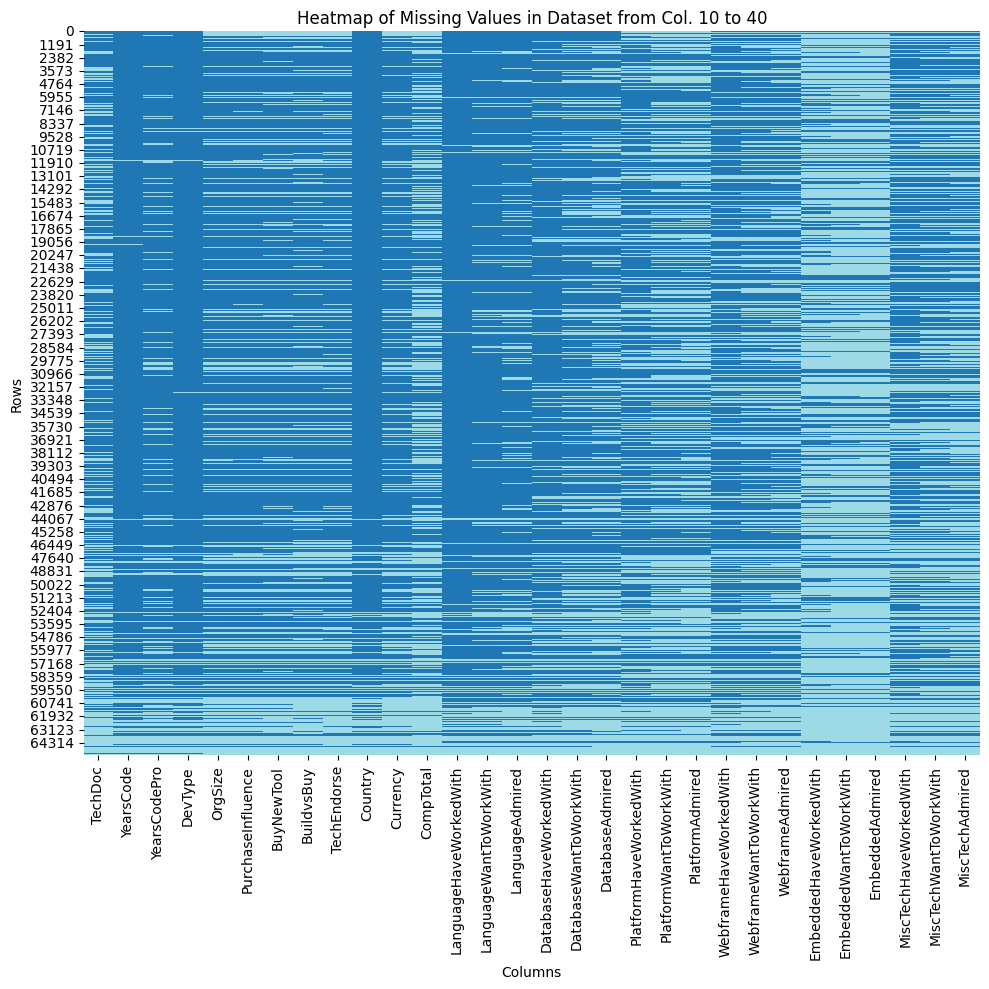

In [9]:
## Write your code here
# Plots heatmap of df missing values
plt.figure(figsize=(10,10))
sns.heatmap(missing_data.iloc[:, 10:40], cbar=False, cmap='tab20')
plt.title('Heatmap of Missing Values in Dataset from Col. 10 to 40')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [10]:
## Write your code here
print(df['Employment'].isnull().value_counts())

Employment
False    65457
Name: count, dtype: int64


'\nAbove code returned False on 65437, meaning \nno rows are empty.\n'

Above code returned False on 65437, meaning no rows are empty.

### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [11]:
## Write your code here
df['Employment'].value_counts().idxmax()

'Employed, full-time'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.




Due to the course providing incorrect datasets, it has been proven that there are no missing rows in Employment. The topic has been brought up by other learners in the discussion forum.

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


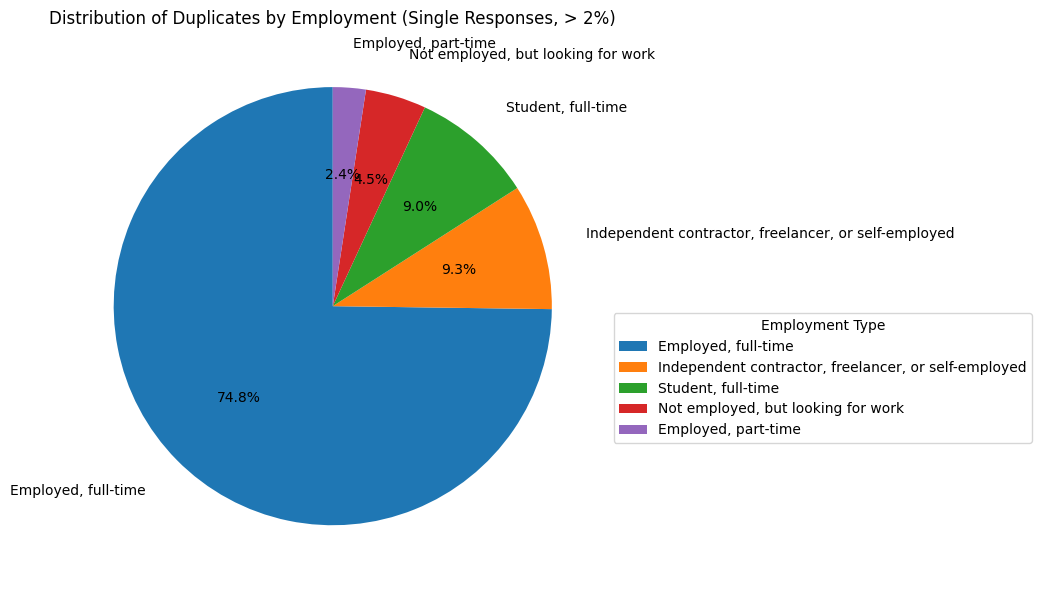

In [13]:
## Write your code here
# Removes mixed results for better graphic; only single answers will plot
employment_clean = df[
    ~df['Employment'].str.contains(';', na=False)
]

# Get value counts and filter down
employment_counts = employment_clean['Employment'].value_counts(normalize=True)
filtered_employment = employment_counts[employment_counts >= 0.02]

# Plotting Employment as pie charts
filtered_employment.plot(kind='pie',
                         autopct='%1.1f%%',
                         startangle=90,
                         labeldistance=1.2,
                         figsize=(10, 6))

# Applies labels and title to graphic
plt.title('Distribution of Duplicates by Employment (Single Responses, > 2%)')
plt.legend(title='Employment Type', loc='best', bbox_to_anchor=(1, 0.5))
plt.ylabel('')
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
